In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
import random
import sampen
import requests
import io
import apache_log_parser
from pprint import pprint
import os
from sklearn import preprocessing
from typing import List
import itertools

In [3]:

df_S = pd.read_csv(f"{os.getcwd()}/wc_day62_63.csv")
df_S["date"] = pd.to_datetime(df_S["date"])
df_S

,Unnamed: 0.1,Unnamed: 0,date,count
0,0,0,1998-06-25 22:00:01,116
1,1,1,1998-06-25 22:00:02,281
2,2,2,1998-06-25 22:00:03,307
3,3,3,1998-06-25 22:00:04,350
4,4,4,1998-06-25 22:00:05,380
...,...,...,...,...
149756,149756,37731,1998-06-27 15:35:47,382
149757,149757,37732,1998-06-27 15:35:48,448
149758,149758,37733,1998-06-27 15:35:49,414
149759,149759,37734,1998-06-27 15:35:50,413


In [4]:
df_6S = df_S.groupby(pd.Grouper(key="date", freq="6S")).sum().reset_index()
df_6S

,date,Unnamed: 0.1,Unnamed: 0,count
0,1998-06-25 22:00:00,10,10,1434
1,1998-06-25 22:00:06,45,45,3231
2,1998-06-25 22:00:12,81,81,2940
3,1998-06-25 22:00:18,117,117,3084
4,1998-06-25 22:00:24,153,153,3117
...,...,...,...,...
24954,1998-06-27 15:35:24,898413,226263,2520
24955,1998-06-27 15:35:30,898449,226299,2512
24956,1998-06-27 15:35:36,898485,226335,2644
24957,1998-06-27 15:35:42,898521,226371,2577


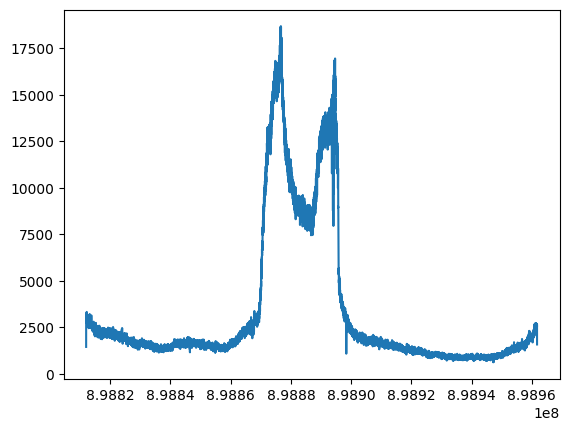

In [6]:
df_6S_date = (pd.to_datetime(df_6S["date"]).astype(int) / 10**9).array.reshape(-1, 1)
df_6S_count = df_6S["count"].array.reshape(-1, 1)
plt.plot(df_6S_date, df_6S_count)
plt.savefig("wc_day62_63.png")